### 統計學習與深度學習 (Fall, 2025)
### Homework 1

請將IPYNB檔與IPYNB Export之HTML檔上傳至COOL作業區。作業自己做。嚴禁抄襲。不接受紙本繳交，不接受遲交。請以英文或中文作答。
如無其他規定，所有重要結果應顯示至小數點第四位(四捨五入)。


### 第一題 [Ridge Regression Baseline]

(30%) 以Ridge Regression進行房價預測。盡可能使用scikit-learn的函數與numpy進行實作。Regularizaiton coefficient (alphas)應考慮介於0.01至100之間的數值，且至少應考慮十種可能的數值。

本題禁止使用'Auto-SKlearn'或其他'AutoML'工具。

訓練資料檔案為'housing_5cities_train.csv', 測試資料檔案為 'housing_5cities_testa.csv'。預測標的為'單價'。你的模型應包含以下特徵:
* 建物面積
* 總樓層數
* 屋齡
* 縣市
* 鄉鎮市區
* 主要用途
* 主要建材
* 建物型態

類別型特徵應進行適當的轉換。

(1) 畫出高雄市資料點的分布，橫坐標為x軸，縱坐標為y軸。依照單價將資料點上色。說明你對資料點個觀察。

(2) 列出最終選用的Regularization Coefficient，以下模型參數，並報告模型在測試資料的預測能力 (包含R2、RMSE、MAE、MAPE)。
* Constant term coefficient
* 建物面積
* 總樓層數
* 屋齡
* 台中市
* 台北市
* 新北市
* 桃園市
* 高雄市

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'Heiti TC'

train_path = "housing_5cities_train.csv"
test_path = "housing_5cities_testa.csv"
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

col_info = pd.DataFrame({
    "Column": df_train.columns,
    "Type": ["Numeric" if pd.api.types.is_numeric_dtype(df_train[col]) else "Categorical" for col in df_train.columns]
})

print(col_info)

    Column         Type
0       縣市  Categorical
1     鄉鎮市區  Categorical
2       路名  Categorical
3     土地面積      Numeric
4     使用分區  Categorical
5     移轉層次      Numeric
6     總樓層數      Numeric
7     主要用途  Categorical
8     主要建材  Categorical
9     建物型態  Categorical
10      屋齡      Numeric
11    建物面積      Numeric
12    車位面積      Numeric
13    車位個數      Numeric
14     橫坐標      Numeric
15     縱坐標      Numeric
16      備註  Categorical
17   主建物面積      Numeric
18    陽台面積      Numeric
19  附屬建物面積      Numeric
20      單價      Numeric


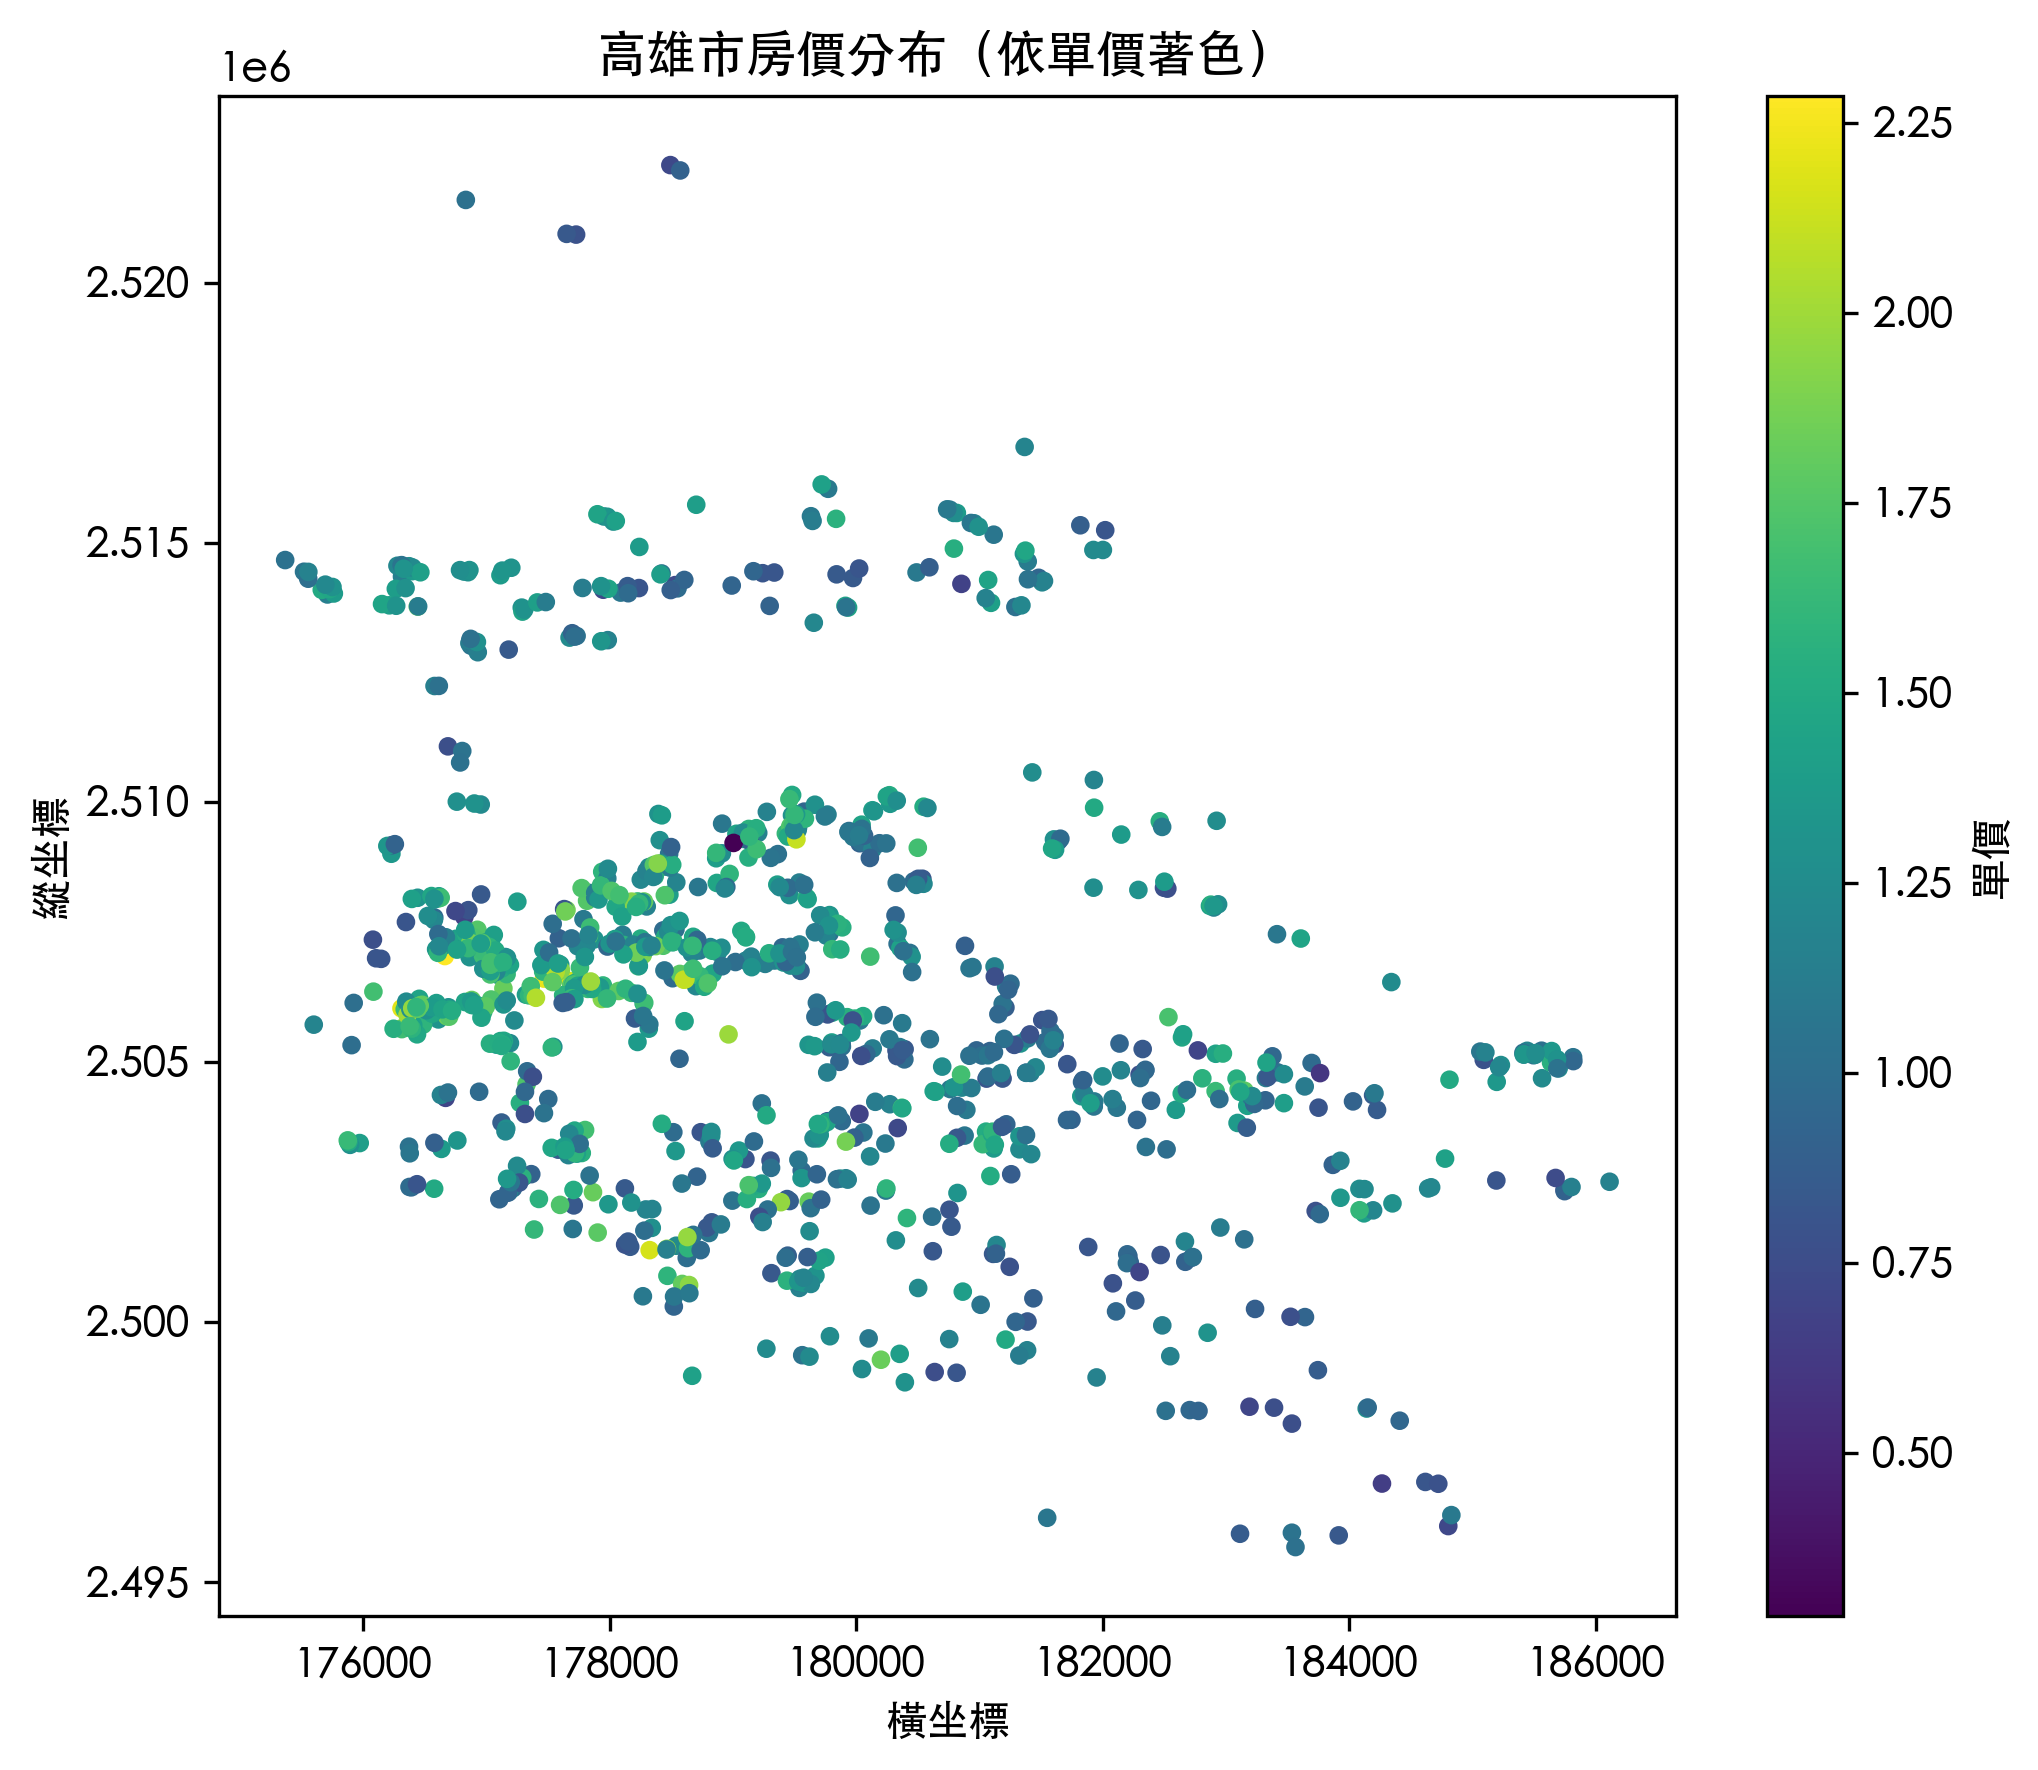

In [2]:
kao = df_train[df_train['縣市'] == '高雄市'].dropna(subset=['橫坐標', '縱坐標', '單價'])


plt.figure(figsize=(7, 6), dpi=300)
sc = plt.scatter(kao['橫坐標'], kao['縱坐標'],
                 c=kao['單價'], s=12, cmap='viridis')
plt.xlabel('橫坐標')
plt.ylabel('縱坐標')
plt.title('高雄市房價分布（依單價著色）')
plt.colorbar(sc, label='單價')
plt.tight_layout()
plt.show()

In [3]:
# Ridge Regression 實作
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# 特徵選擇
features = [
    "建物面積", "總樓層數", "屋齡", "縣市", "鄉鎮市區", "主要用途", "主要建材", "建物型態"
]
X_train = df_train[features]
X_test = df_test[features]
y_train = df_train["單價"]
y_test = df_test["單價"]

# 類別型特徵 one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# RidgeCV: 自動選擇最佳 alpha
alphas = np.logspace(-2, 2, 20)
model = RidgeCV(alphas=alphas, store_cv_values=True)
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Best alpha: {model.alpha_}")
print(f"R2: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")
print("Coefficients:")
print(dict(zip(X_train.columns, model.coef_)))

TypeError: _BaseRidgeCV.__init__() got an unexpected keyword argument 'store_cv_values'

In [ ]:
import sklearn
print(sklearn.__version__)

1.4.2


In [ ]:
conda update scikit-learn

Retrieving notices: done
Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.9.9   |       hca03da5_0         127 KB
    certifi-2025.8.3           |  py312hca03da5_0         161 KB
    libcxx-20.1.8              |       h8869778_0         351 KB
    llvm-openmp-20.1.8         |       he822017_0         327 KB
    openssl-3.0.17             |       h4ee41c1_0         4.3 MB
    scikit-learn-1.7.2         |  py312hc6ded6b_0         8.5 MB
    threadpoolctl-3.5.0        |  py312h989b03a_0          49 KB
    ------------------------------------------------------------
                                           Total:        13.8 MB

The following packages will be UPDATED:

  ca-certificates            

### 第二題 [Gaussian Basis Function]

(35%) Gaussian Basis Function (GBF) 常用來擴展特徵。在房價預測中，我們可以挑選某些位置作為GBF的均數，並設定合理的變異數，即可利用GBF識別某筆資料是否為在選定的位置附近。

我們在課程中定義過一維情境下計算GBF特徵值的公式為:

$exp(- \frac{(x_a - \mu_j)^2}{2 s_j^2}), $

其中 $x_a$ 為資料點，而 $mu_j$  是選定的錨點 (Anchor)，標準差$s_j$ 是用來控管要訂多寬的區域。

房價資料的位置資訊為二維空間，因此如果資料點的位置是 $(x_a, y_a)$, 錨點是 $(\mu_{xj}, \mu_{yj})$、標準差是 $(s_{xj}, s_{yj})$，那GBF特徵值為:

$exp(- \frac{(x_a - \mu_{xj})^2}{2 s_{xj}^2} - \frac{(y_a - \mu_{yj})^2}{2 s_{yj}^2} )$

(1) 

這題我們只選擇一個錨點，定義為所有高雄市訓練資料的橫、縱座標平均值。橫軸的標準差取為高雄市訓練資料的 X 座標標準差，縱軸則取為 Y 座標的標準差。利用上面的公式計算 GBF 特徵值。請列出該錨點的座標與標準差，並為所有訓練資料計算 GBF 特徵值，依照縣市輸出描述統計（count, mean, std, min, 25%, 50%, 75%, max）。

(2) 

依照以下方式產生多個錨點，並使用 GBF 生成新的特徵，與 Q1 的所有特徵合併後，建構新的 Ridge Regression 預測模型，並計算其在測試資料上的預測能力（包含 R²、RMSE、MAE、MAPE）。

Regularizaiton coefficient (alphas)應考慮介於 0.01 至 100 之間的數值，且至少應考慮十種可能的數值。對每個城市 C，找出能包含所有資料點的邊界矩形，並將橫軸與縱軸各切成 $K$ 等分，形成 $K^2$ 個格子。若一個格子內有不少於 20 筆資料，則計算該格子內所有資料點的橫、縱座標平均值作為中心點，橫、縱座標的標準差作為尺度，定義為一個錨點；若一個格子內的資料點少於 20，則忽略該格子。請列出各縣市所產生的錨點。設 $K$ = 3，請計算模型在測試資料上的 R²、RMSE、MAE、MAPE，並與 Q1 baseline 結果比較。



### 第三題 [Sigmoidal Basis Features]

(35%) 

(1) 

對每個數值特徵 $x$（建物面積、總樓層數、屋齡）建立5個 **Sigmoidal basis**：

$$
\phi(x;\mu,s) = \frac{1}{1 + \exp\!\left(-\frac{x-\mu}{s}\right)}
$$

其中 $\mu$（中心）以**訓練資料**該特徵的分位數決定（ $q \in \{0.1,0.3,0.5,0.7,0.9\}$）；  
$s$（斜率尺度）以**訓練資料**該特徵的 IQR（Q3 − Q1）之 $0.25$ 倍決定。  
請記錄各特徵所用的 $\mu$ 與 $s$，並以同一組參數轉換測試資料。 
請將計算結果輸出，包含：  
- 特徵名稱  
- 5 個對應的 $\mu$ 值  
- 該特徵的 $s$ 值   

(2) 

將本題產生的 Sigmoidal basis 特徵與 **Q1 的特徵**（**不加入 Q2 的 GBF**）合併，在訓練集選擇最佳 $\alpha$，Regularizaiton coefficient (alphas) 應考慮介於0.01至100之間的數值，且至少應考慮十種可能的數值。
請計算模型在測試資料上的 R²、RMSE、MAE、MAPE，並比較結果與 **Q1** 以及 **Q2** 之差異，說明 Sigmoidal basis 是否改善預測與可能原因。  
